<a href="https://colab.research.google.com/github/mrezap/learning_course/blob/main/Dicoding_Submission_ML_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Profil Diri

*   Nama     : Maulana Reza Pahlevi
*   Kelas    : Belajar Machine Learning Untuk Pemula
*   Topik    : Submisi Tugas Akhir ML
*   Platform : Dicoding


# Import & Download Dataset

In [ ]:
!wget --no-check-certificate \
https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip -O /tmp/rockpaperscissors.zip

# ZIP Extraction

In [ ]:
import zipfile, os


unzip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(unzip, 'r')
zip_ref.extractall('/tmp/rps_data/')
zip_ref.close()

In [ ]:
# setup directory
base_dir = '/tmp/rps_data/rockpaperscissors/'
train_dir = os.path.join(base_dir, 'rps-cv-images') # train directory

# Creating Object for ImageDataGenerator

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator (rescale = 1./255,
    shear_range = 0.2,
    rotation_range = 40,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest',
    validation_split = 0.4 # validation measure 40%
)

test_datagen = ImageDataGenerator (rescale = 1./255,
    shear_range = 0.2,
    rotation_range = 40,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest',
    validation_split = 0.4 # validation measure 40%
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=16,
    shuffle=True,
    interpolation ="nearest",
    subset='training',
    class_mode='categorical' # multi-class classification
)

validation_generator = test_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=16,
    shuffle=True,
    interpolation ="nearest",
    subset='validation',
    class_mode='categorical' # multi-class classification
)

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


# Model Impelementation w/ CNN

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# create model
model = keras.Sequential([
    # 01 CNN Process
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D(2, 2),
    # 02 CNN Process
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    # 03 CNN Process
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    # 04 CNN Process
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    # Flattening Process
    layers.Dropout(0.5),
    layers.Flatten(),
    # hidden layer
    layers.Dense(256, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(3, activation='softmax')
])

# compile model
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


# fitting model
model_history = model.fit(
    train_generator,
    steps_per_epoch=50, 
    epochs=25, 
    validation_data=validation_generator, 
    validation_steps=5,
    verbose=1)

Epoch 1/25
50/50 [==============================] - 27s 539ms/step - loss: 1.1081 - accuracy: 0.3812 - val_loss: 3.1030 - val_accuracy: 0.3500
Epoch 2/25
50/50 [==============================] - 26s 530ms/step - loss: 1.0109 - accuracy: 0.5700 - val_loss: 0.8445 - val_accuracy: 0.6500
Epoch 3/25
50/50 [==============================] - 26s 526ms/step - loss: 0.6313 - accuracy: 0.7481 - val_loss: 0.3918 - val_accuracy: 0.8625
Epoch 4/25
50/50 [==============================] - 27s 531ms/step - loss: 0.4762 - accuracy: 0.8250 - val_loss: 0.4919 - val_accuracy: 0.8375
Epoch 5/25
50/50 [==============================] - 28s 556ms/step - loss: 0.4668 - accuracy: 0.8206 - val_loss: 0.3564 - val_accuracy: 0.9125
Epoch 6/25
50/50 [==============================] - 27s 536ms/step - loss: 0.3655 - accuracy: 0.8575 - val_loss: 0.3693 - val_accuracy: 0.9125
Epoch 7/25
50/50 [==============================] - 26s 518ms/step - loss: 0.2940 - accuracy: 0.8791 - val_loss: 0.1591 - val_accuracy: 0.9375

# Model Evaluation

In [ ]:
# train & val score evaluation
train_score = model.evaluate(train_generator)
val_score = model.evaluate(validation_generator)
print('\nTrain Loss Score : {:.2f} and Train Accuracy Score : {:.2f}'.format(train_score[0],train_score[1]))
print('Validation Loss Score : {:.2f} and Validation Accuracy Score : {:.2f}'.format(val_score[0],val_score[1]))

55/55 [==============================] - 11s 199ms/step - loss: 0.0850 - accuracy: 0.9748

Train Loss Score : 0.06 and Train Accuracy Score : 0.99
Validation Loss Score : 0.09 and Validation Accuracy Score : 0.97


# Classification Summary

In [ ]:
import numpy as np
from sklearn.metrics import classification_report

Y_pred = model.predict(validation_generator, 12)
y_pred = np.argmax(Y_pred, axis=1)

title = 'Classification Summary'
print(title)
obj_name = ['Rock', 'Paper', 'Scissors']
print(classification_report(validation_generator.classes, y_pred, target_names=obj_name))


Classification Summary
              precision    recall  f1-score   support

        Rock       0.32      0.32      0.32       284
       Paper       0.35      0.35      0.35       290
    Scissors       0.34      0.34      0.34       300

    accuracy                           0.34       874
   macro avg       0.34      0.34      0.34       874
weighted avg       0.34      0.34      0.34       874



# Prediction Test using custom file (image upload)

Saving test13.jpg to test13 (1).jpg
test13.jpg
Image is paper


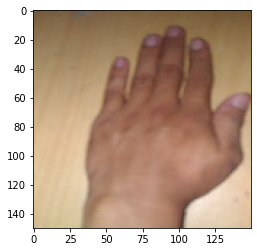

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

img_uploaded = files.upload()

# image prediction

for fn in img_uploaded.keys():
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=12)

  print(fn)
  if classes[0,0] == 1.0:
    print('Image is paper')
  elif classes[0,1] == 1.0:
    print('Image is rock')
  else:
    print('Image is scissors')